# House Price Prediction for Surprise Housing Company

## Approach
Based on the business problem and looking at the dataset at a high level, below steps will be followed to solve the case study problem :-

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Final Analysis & Outcome
    - SLR vs Ridge Vs Lasso
    - Train Vs Test Metrics
    - Top Predictors or Features
    - Top Predictors vs Relative Importance
- Conlclusion

In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
import statsmodels.api as sm

from scipy.stats import norm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

### Data Understanding and Exploration

In [3]:
# Reading the dataset
house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# shape
house.shape

(1460, 81)

In [5]:
# info of dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# description of dataframe
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Missing values check
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
# percentage view of missing value
round(100*(house.isnull().sum()/len(house.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [9]:
# Data duplicate check
house_dup = house.copy()
house_dup.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# Checking for duplicates and dropping the entire duplicate row if any
house_dup.drop_duplicates(subset=None, inplace=True)
house_dup.shape

(1460, 81)

**Insight**
- There are total 1460 rows and 87 cols in the dataframe (incl. numerical and categorical) 
- The dataset is not clean and it contains multiple missing values
- As the shape after executing the drop duplicate is same. Hence, we can conclude that there is zero duplicate values in the dataframe

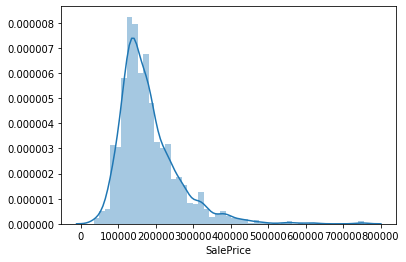

In [11]:
sns.distplot(house['SalePrice'])
plt.show()

In [12]:
house['SalePrice'].skew()

1.8828757597682129

### Derived Fields

In [13]:
# creating a new col IsRemod - 1 if remodelled after built else 0
def checkRemodStatus(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    else:
        return 1
    
house['IsRemod'] = house.apply(checkRemodStatus, axis=1)
house['IsRemod']= house['IsRemod'].astype('object')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemod
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0


Converting given dates(in years) as YearBuilt, YrSold, GarageYrBlt, YearRemodAdd to number of years from today by adding new cols as BuiltDays, LastSoldDays, GarageDays, LastRemodDays respectively

In [14]:
house['BuiltAge'] = pd.datetime.now().year - house['YearBuilt']
house['LastSoldAge'] = pd.datetime.now().year - house['YrSold']
house['GarageAge'] = pd.datetime.now().year - house['GarageYrBlt']
house['LastRemodAge'] = pd.datetime.now().year - house['YearRemodAdd']

In [15]:
house[['BuiltAge','LastSoldAge', 'GarageAge', 'LastRemodAge']].describe()

,BuiltAge,LastSoldAge,GarageAge,LastRemodAge
count,1460.000000,1460.000000,1379.000000,1460.000000
mean,49.732192,13.184247,42.493836,36.134247
std,30.202904,1.328095,24.689725,20.645407
min,11.000000,11.000000,11.000000,11.000000
25%,21.000000,12.000000,19.000000,17.000000
50%,48.000000,13.000000,41.000000,27.000000
75%,67.000000,14.000000,60.000000,54.000000
max,149.000000,15.000000,121.000000,71.000000


In [16]:
house[['BuiltAge','LastSoldAge', 'GarageAge', 'LastRemodAge']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
BuiltAge        1460 non-null int64
LastSoldAge     1460 non-null int64
GarageAge       1379 non-null float64
LastRemodAge    1460 non-null int64
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [17]:
house[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','BuiltAge','LastSoldAge','GarageAge','LastRemodAge']].head(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,BuiltAge,LastSoldAge,GarageAge,LastRemodAge
0,2003,2003,2003.0,2008,18,13,18.0,18
1,1976,1976,1976.0,2007,45,14,45.0,45
2,2001,2002,2001.0,2008,20,13,20.0,19
3,1915,1970,1998.0,2006,106,15,23.0,51
4,2000,2000,2000.0,2008,21,13,21.0,21
5,1993,1995,1993.0,2009,28,12,28.0,26
6,2004,2005,2004.0,2007,17,14,17.0,16
7,1973,1973,1973.0,2009,48,12,48.0,48
8,1931,1950,1931.0,2008,90,13,90.0,71
9,1939,1950,1939.0,2008,82,13,82.0,71


In [18]:
# dropping actual year cols
house = house.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

**Insight** -
- 4 Columns are removed from Original dataframe i.e. 'YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'
- 5 new columns are added to Original Dataframe i.e. 'IsRemod','BuiltAge','LastSoldAge','GarageAge','LastRemodAge'

#### Missing Value Check and Data Correction

In [19]:
house.Id.nunique()

1460

In [20]:
# Dropping ID column as all are unique and not needed for prediction
house.drop('Id', axis=1, inplace=True)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,IsRemod,BuiltAge,LastSoldAge,GarageAge,LastRemodAge
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,WD,Normal,208500,0,18,13,18.0,18
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,WD,Normal,181500,0,45,14,45.0,45
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,WD,Normal,223500,1,20,13,20.0,19
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,WD,Abnorml,140000,1,106,15,23.0,51
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,WD,Normal,250000,0,21,13,21.0,21


In [21]:
house.MSSubClass.dtype

dtype('int64')

In [22]:
# As per data definition MSSubClass-Identifies the type of dwelling involved in the sale.
# datatype should be categorical and not integer. Changeing the datatype of the resp. col
house.MSSubClass=house.MSSubClass.astype('object')
house.MSSubClass.dtype

dtype('O')

In [23]:
# checking the unique value of col Alley
house.Alley.value_counts(normalize=True)

Grvl    0.549451
Pave    0.450549
Name: Alley, dtype: float64

In the given dataset NA = No alley access. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'No Alley'

In [24]:
house['Alley'].fillna('No Alley', inplace=True)
house.Alley.isnull().sum()

0

In [25]:
house.Alley.value_counts()

No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

In [26]:
house.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In the given dataset NA = No Basement. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'No Basement'

In [27]:
house['BsmtQual'].fillna('No Basement', inplace=True)
house.BsmtQual.isnull().sum()

0

In [28]:
house.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [29]:
house.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [30]:
house['BsmtCond'].fillna('No Basement', inplace=True)
house.BsmtCond.isnull().sum()

0

In [31]:
house.BsmtCond.value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [32]:
house.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [33]:
house['BsmtExposure'].fillna('No Basement', inplace=True)
house.BsmtExposure.isnull().sum()

0

In [34]:
house.BsmtExposure.value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

In [35]:
house.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [36]:
house['BsmtFinType1'].fillna('No Basement', inplace=True)
house.BsmtFinType1.value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [37]:
house['BsmtFinType2'].fillna('No Basement', inplace=True)
house.BsmtFinType2.value_counts()

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In the given dataset NA = No Fireplace. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'No Fireplace'

In [38]:
house['FireplaceQu'].fillna('No Fireplace', inplace=True)
house.FireplaceQu.value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In the given dataset NA = No Garage. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'No Garage'

In [39]:
house['GarageType'].fillna('No Garage', inplace=True)
house.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [40]:
house['GarageFinish'].fillna('No Garage', inplace=True)
house.GarageFinish.value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

In [41]:
house['GarageQual'].fillna('No Garage', inplace=True)
house.GarageQual.value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

In [42]:
house['GarageCond'].fillna('No Garage', inplace=True)
house.GarageCond.value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In the given dataset NA = No Pool. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'No Pool'

In [43]:
house['PoolQC'].fillna('No Pool', inplace=True)
house.PoolQC.value_counts()

No Pool    1453
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64

In the given dataset NA = No Fence. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'No Fence'

In [44]:
house['Fence'].fillna('No Fence', inplace=True)
house.Fence.value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In the given dataset NA = None. But dataframe consider it as missing value and imputed as 'NaN'.So, replacing 'NaN' with 'None'

In [45]:
house['MiscFeature'].fillna('None', inplace=True)
house.MiscFeature.value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [46]:
# Checking cols with missing values
round(house.isnull().sum()/len(house.index),2)[round(house.isnull().sum()/len(house.index),2).values>0]

LotFrontage    0.18
MasVnrType     0.01
MasVnrArea     0.01
GarageAge      0.06
dtype: float64

In [47]:
house.columns[house.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageAge'], dtype='object')

**Insight** -
- Identified few reference fields to be used for deriving new field
- Col with improper datatype were mapped to correct datatype
- NA were replaced with real values as given in data definition sheet, wherever required

#### Missing Values Imputation

In [48]:
house.isnull().sum().sort_values(ascending=False)[:5]

LotFrontage    259
GarageAge       81
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [49]:
house.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

LotFrontage is Linear feet of street connected to property. It is safe to replace NA with minimum value assuming it's legal compliance needs to be followed by owner/builder.

In [50]:
house['LotFrontage'].fillna(house['LotFrontage'].min(), inplace=True)
house.LotFrontage.describe()

count    1460.00000
mean       61.34863
std        28.92032
min        21.00000
25%        42.00000
50%        63.00000
75%        79.00000
max       313.00000
Name: LotFrontage, dtype: float64

In [51]:
house.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

MasVnrType is Masonry veneer type. We will replace the missing values with mode i.e. None

In [52]:
house['MasVnrType'].fillna('None', inplace=True)
house.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [53]:
house.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

MasVnrArea is Masonry veneer area in square feet. It's safe to replace missing values with minimum value

In [54]:
house['MasVnrArea'].fillna(house['MasVnrArea'].min(), inplace=True)
house.MasVnrArea.describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [55]:
house.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Electrical is Electrical system in the house. As, there is only 1 missing value it's better to drop that row

In [56]:
house = house[house['Electrical'].notna()]
house['Electrical'].isnull().sum()

0

In [57]:
# checking the shape after dropping one row
house.shape

(1459, 81)

In [58]:
# Replacing NaN with -1 as these houses donot have garage
house.GarageAge.fillna(-1,inplace=True)

In [59]:
# checking the null values in cols post imputation
house.isnull().sum().sort_values(ascending=False)[:5]

LastRemodAge    0
Electrical      0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
dtype: int64

In [60]:
# checking null values in rows post imputation
house.isnull().sum(axis=1).sort_values(ascending=False)[:5]

1459    0
478     0
480     0
481     0
482     0
dtype: int64

In [61]:
len(house.columns)

81

### Exploratory Data Analysis (EDA)

In [62]:
# separating numerical and categorical columns

types_df = house.dtypes #type of each feature in dataset: int, float, object
types_df.value_counts()

object     45
int64      33
float64     3
dtype: int64

In [63]:
# output col
out_col = 'SalePrice'

# numerical col
num_col = list((types_df[(types_df == 'int64') | (types_df == 'float64')]).index)
print(len(num_col))

# categorical col
cat_col = list((types_df[types_df == object]).index) 
print(len(cat_col))

36
45


In [64]:
# function to plot numerical data
def num_col_analysis(features, rows, cols):
    fig=plt.figure(figsize=(20,80))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.scatterplot(x=feature,y='SalePrice',data=house)
        plt.xticks(rotation = 45)
        ax.set_title(feature+" v/s SalePrice",color='red')
       
    fig.tight_layout()  
    plt.show()

In [65]:
# function to plot categorical data
def cat_col_analysis(features, rows, cols):
    fig=plt.figure(figsize=(20,80))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(x=feature,y='SalePrice',data=house)
        plt.xticks(rotation = 90)
        ax.set_title("Boxplot for " + feature,color='blue')
       
    fig.tight_layout()  
    plt.show()

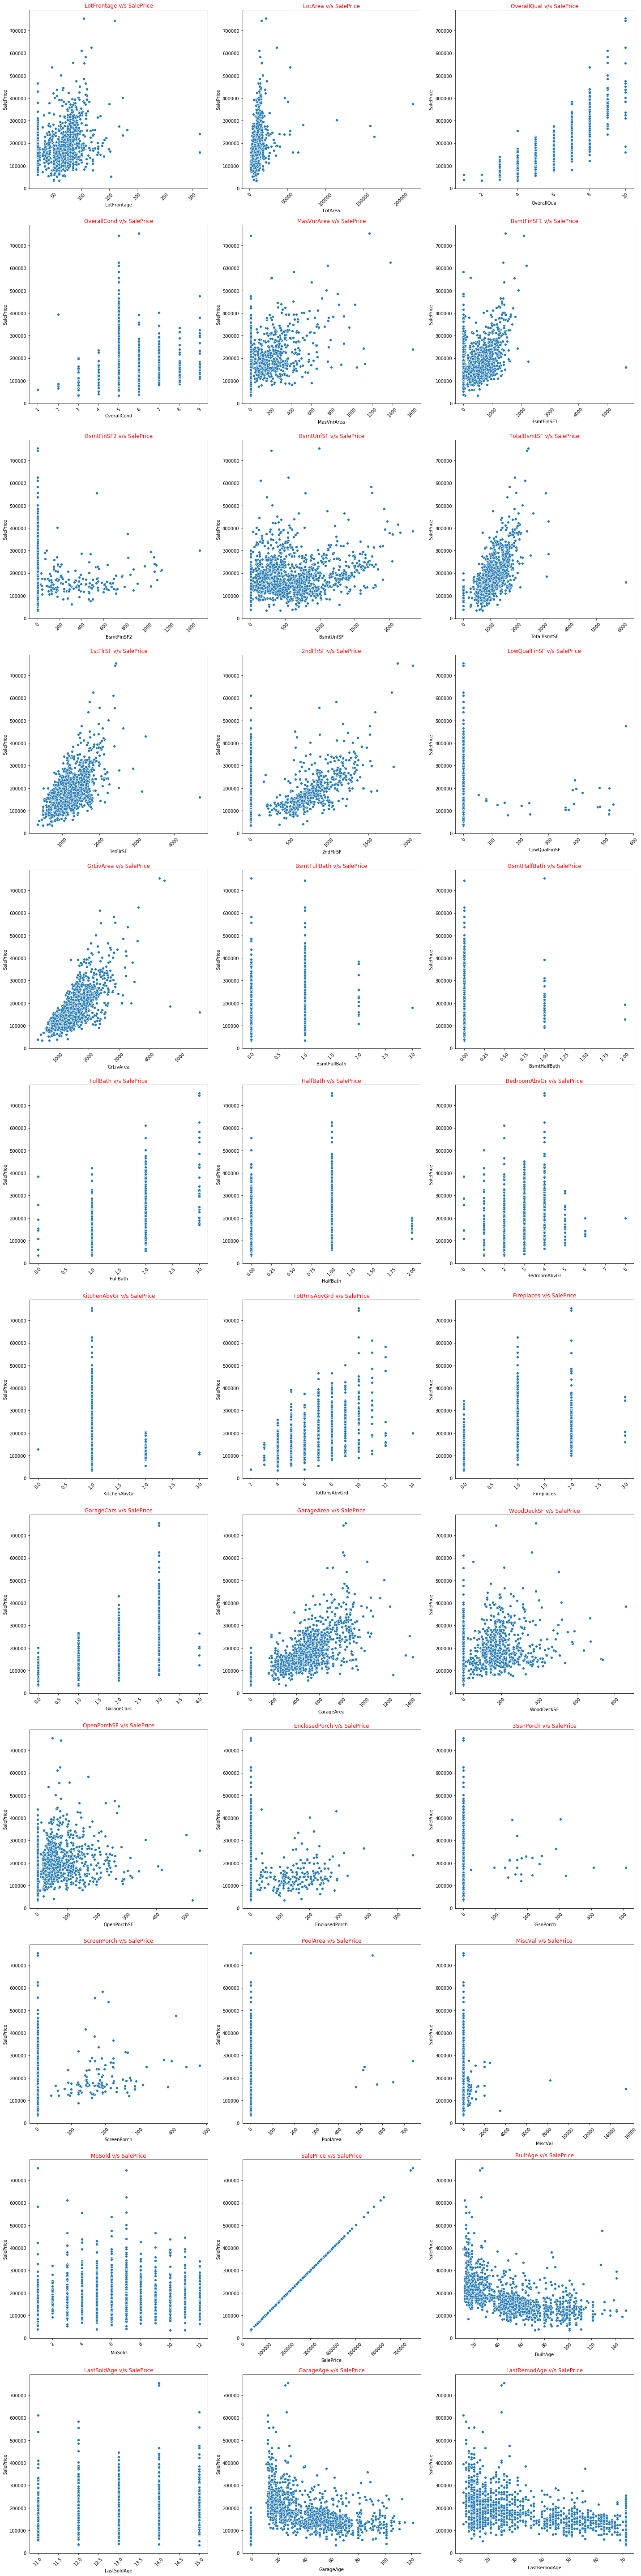

In [66]:
# plotting numerical col for analysis
num_col_analysis(num_col,12, 3)

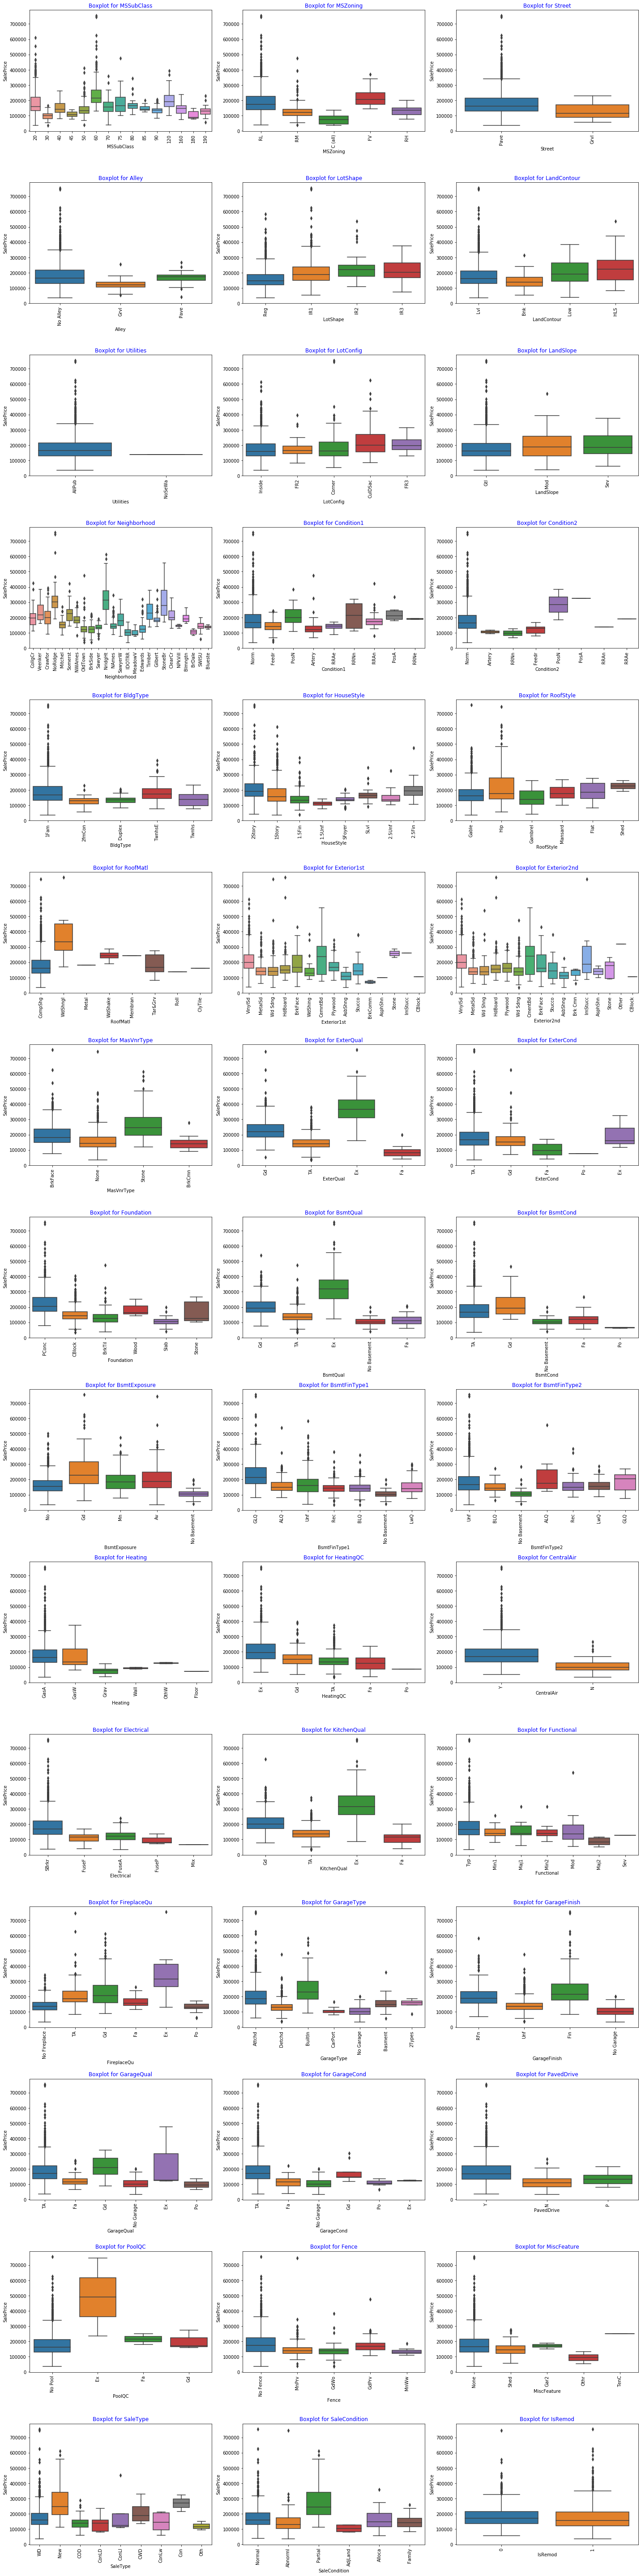

In [67]:
# plotting categorical col for analysis
cat_col_analysis(cat_col,15, 3)

**Insights**  
Numerica Col Analysis  
- Sale price is also increasing with more cars in garages
- Sale price increasing with OverallQual
- Sale price increasing with more fireplace and more rooms
- Sale price increasing with max FullBath: Full bathrooms above grade
  
Categorical Col Analysis  
- Median SalePrice for SaleCondition as Partial is higher than others
- Median SalePrice for IsRemod as No(0) is slighty higher than IsRemod as Yes (1)
- Median SalePrice for Fence as MnWw is least than others
- Median SalePrice for GarageFinish as Fin is higher than others
- Median SalePrice for GarageType as BuiltIn is higher than others

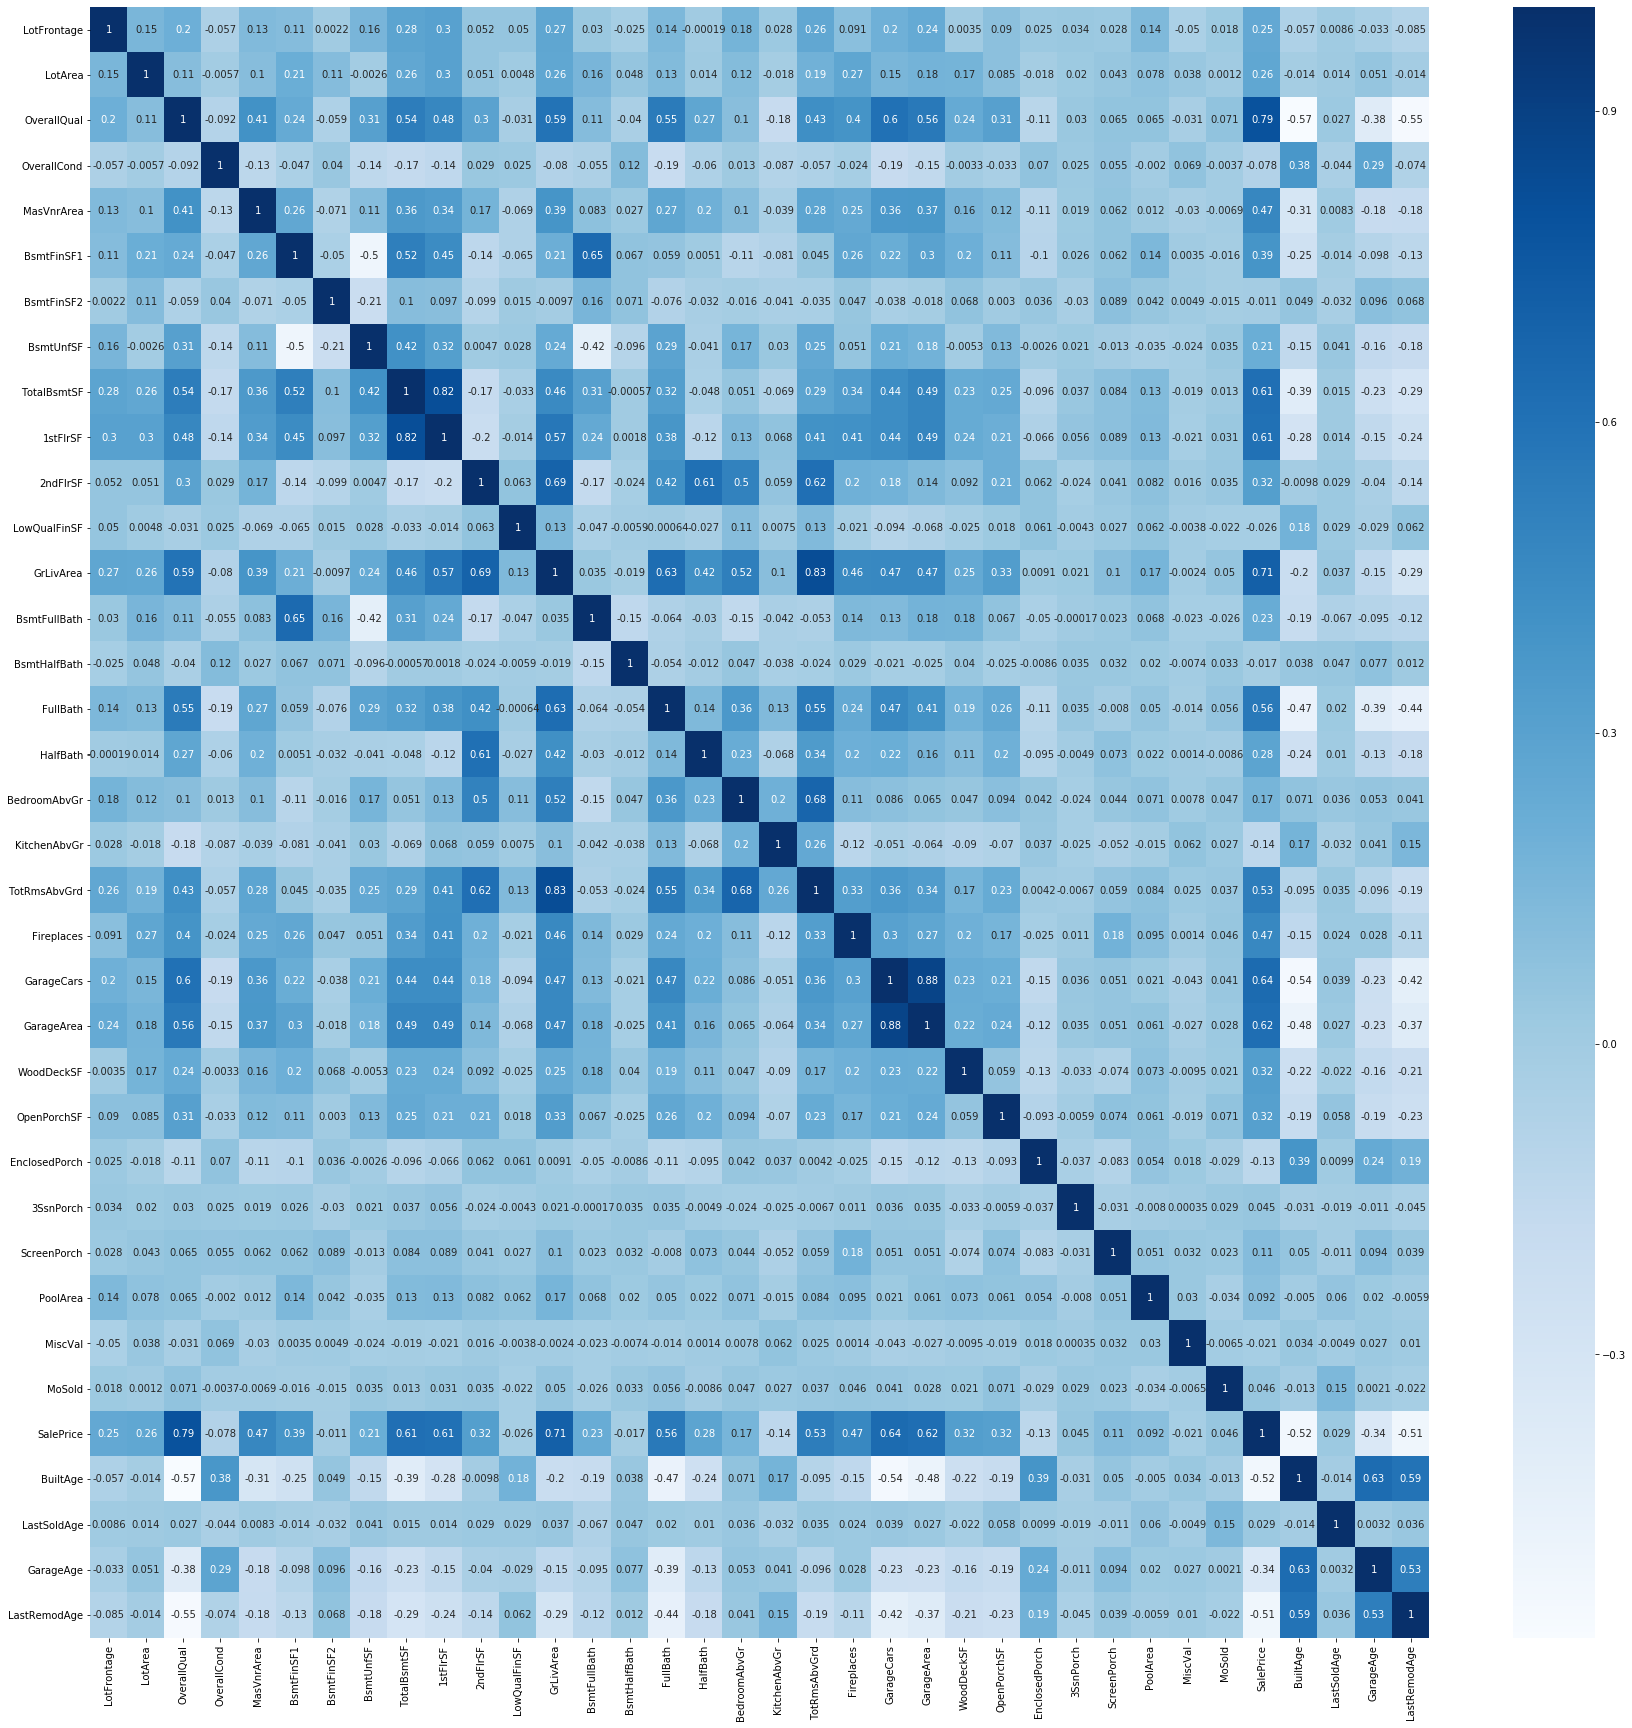

In [68]:
# checking correlation of numerical column
plt.figure(figsize = (30, 30))
sns.heatmap(house[num_col].corr(), annot = True, cmap="Blues")
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Removing following columns which shows high correlation between dependent variables (>0.80)

- TotalBsmtSF and 1stFlrSF shows 0.82
- Garage Area and Garage Cars shows 0.88
- TotRmsAbvGrd and GrLivArea shows 0.83

In [69]:
house.drop(['GarageArea','TotRmsAbvGrd','1stFlrSF'], axis = 1, inplace = True)

In [70]:
house.shape

(1459, 78)

#### Data Preparation

Converting the ordinal type categorical columns using label encoder

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [72]:
house.ExterQual = le.fit_transform(house.ExterQual)
house.ExterQual.value_counts(ascending=False)

3    905
2    488
0     52
1     14
Name: ExterQual, dtype: int64

In [73]:
house.ExterCond = le.fit_transform(house.ExterCond)
house.ExterCond.value_counts(ascending=False)

4    1281
2     146
1      28
0       3
3       1
Name: ExterCond, dtype: int64

In [74]:
house['BsmtQual'] = house.BsmtQual.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house.BsmtQual.value_counts(ascending=False)

3    649
4    617
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

In [75]:
house['BsmtCond'] = house.BsmtCond.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house.BsmtCond.value_counts(ascending=False)

3    1310
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64

In [76]:
house['BsmtExposure'] = house.BsmtExposure.map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house.BsmtExposure.value_counts(ascending=False)

1    952
3    221
4    134
2    114
0     38
Name: BsmtExposure, dtype: int64

In [77]:
house['BsmtFinType1'] = house.BsmtFinType1.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house.BsmtFinType1.value_counts(ascending=False)

1    429
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64

In [78]:
house['BsmtFinType2'] = house.BsmtFinType2.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house.BsmtFinType2.value_counts(ascending=False)

1    1255
3      54
2      46
0      38
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64

In [79]:
house['HeatingQC'] = house.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house.HeatingQC.value_counts(ascending=False)

4    741
2    428
3    240
1     49
0      1
Name: HeatingQC, dtype: int64

In [80]:
house['KitchenQual'] = house.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house.KitchenQual.value_counts(ascending=False)

2    735
3    585
4    100
1     39
Name: KitchenQual, dtype: int64

In [81]:
house['FireplaceQu'] = house.FireplaceQu.map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house.FireplaceQu.value_counts(ascending=False)

0    689
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

In [82]:
house['GarageQual'] = house.GarageQual.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house.GarageQual.value_counts(ascending=False)

3    1310
0      81
2      48
4      14
5       3
1       3
Name: GarageQual, dtype: int64

In [83]:
house['GarageCond'] = house.GarageCond.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house.GarageCond.value_counts(ascending=False)

3    1325
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64

In [84]:
house['PoolQC'] = house.PoolQC.map({'No Pool':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house.PoolQC.value_counts(ascending=False)

0    1452
3       3
4       2
1       2
Name: PoolQC, dtype: int64

In [85]:
house.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

**Dropping variables with least variance i.e occurence of single value >= 85% of entire dataset (col.value_count.max >= 0.85*1459)**

In [86]:
# function to get list of cols with least variance
def getLowVarianceCol():
    column = []
    for col in (house.columns):
        if(house[col].value_counts().max() >= (0.85*len(house))):
            column.append(col)
    return column

colsToDrop = getLowVarianceCol()
colsToDrop

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature',
 'MiscVal',
 'SaleType']

In [87]:
house.drop(colsToDrop, axis = 1, inplace = True)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,IsRemod,BuiltAge,LastSoldAge,GarageAge,LastRemodAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,2,PConc,4,1,6,706,150,856,4,854,1710,1,2,1,3,3,0,0,Attchd,RFn,2,0,61,No Fence,2,Normal,208500,0,18,13,18.0,18
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,284,1262,4,0,1262,0,2,0,3,2,1,3,Attchd,RFn,2,298,0,No Fence,5,Normal,181500,0,45,14,45.0,45
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,2,PConc,4,2,6,486,434,920,4,866,1786,1,2,1,3,3,1,3,Attchd,RFn,2,0,42,No Fence,9,Normal,223500,1,20,13,20.0,19
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,540,756,3,756,1717,1,1,0,3,3,1,4,Detchd,Unf,3,0,35,No Fence,2,Abnorml,140000,1,106,15,23.0,51
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,2,PConc,4,3,6,655,490,1145,4,1053,2198,1,2,1,4,3,1,3,Attchd,RFn,3,192,84,No Fence,12,Normal,250000,0,21,13,21.0,21


In [88]:
len(house.columns)

48

In [89]:
# before creating dummy variables, updating list of cat_col to exclude encoded ordinal cols
cat_col = list((house.columns[house.dtypes == object])) 
print(len(cat_col),'\n')
print(cat_col)

17 

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition', 'IsRemod']


**Creating Dummy for categorical variable**

In [90]:
dummy_col =  pd.get_dummies(house[cat_col],drop_first=True)
house = pd.concat([house,dummy_col],axis=1)

# dropping actual col 
house.drop(cat_col,axis=1,inplace=True)
house.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,BuiltAge,LastSoldAge,GarageAge,LastRemodAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,IsRemod_1
0,65.0,8450,7,5,196.0,2,4,1,6,706,150,856,4,854,1710,1,2,1,3,3,0,0,2,0,61,2,208500,18,13,18.0,18,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,80.0,9600,6,8,0.0,3,4,4,5,978,284,1262,4,0,1262,0,2,0,3,2,1,3,2,298,0,5,181500,45,14,45.0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,68.0,11250,7,5,162.0,2,4,2,6,486,434,920,4,866,1786,1,2,1,3,3,1,3,2,0,42,9,223500,20,13,20.0,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,60.0,9550,7,5,0.0,3,3,1,5,216,540,756,3,756,1717,1,1,0,3,3,1,4,3,0,35,2,140000,106,15,23.0,51,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,84.0,14260,8,5,350.0,2,4,3,6,655,490,1145,4,1053,2198,1,2,1,4,3,1,3,3,192,84,12,250000,21,13,21.0,21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

In [91]:
house.shape

(1459, 152)

### Train-Test Split

In [92]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(house, test_size = 0.3, random_state = 42)

In [93]:
df_train.shape

(1021, 152)

In [94]:
df_test.shape

(438, 152)

In [95]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 152 entries, LotFrontage to IsRemod_1
dtypes: float64(3), int32(1), int64(27), uint8(121)
memory usage: 571.5 KB


In [96]:
# updating list of numerical columns
num_col =list((house.dtypes[house.dtypes != np.uint8]).index)
num_col

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'SalePrice',
 'BuiltAge',
 'LastSoldAge',
 'GarageAge',
 'LastRemodAge']

#### Scaling of train and test dataset

In [97]:
scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [98]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,BuiltAge,LastSoldAge,GarageAge,LastRemodAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,IsRemod_1
135,0.67473,-0.020006,0.64319,0.416829,1.065330,0.670264,-0.533302,-0.587292,-1.214901,-0.966615,1.643360,0.533770,-0.157974,-0.795438,0.310528,-0.829310,0.787445,-0.767504,0.143188,-0.772583,0.600163,1.198128,0.290659,0.040535,-0.709823,-0.495751,-0.089682,0.054393,-0.150096,0.409846,0.710452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
1452,-0.91512,-0.638544,-0.82429,-0.494482,-0.127521,0.670264,0.577925,2.210336,1.146892,0.210650,-1.286379,-1.158455,-0.157974,-0.795438,-0.861238,1.108277,-1.065046,-0.767504,-1.075104,-0.772583,-0.947226,-1.005003,0.290659,-0.734969,-0.299767,-0.495751,-0.454641,-1.098468,1.352336,-0.931225,-0.973103,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1046,0.85138,0.500209,2.11067,-0.494482,0.606542,-0.752479,1.689151,1.277793,1.146892,-0.450082,2.649897,2.071750,0.889374,1.215725,2.588747,-0.829310,2.639936,1.231531,1.361480,2.249668,0.600163,1.198128,1.645741,0.958479,0.871819,0.254118,4.725031,-1.098468,1.352336,-0.931225,-1.021204,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,

In [99]:
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,BuiltAge,LastSoldAge,GarageAge,LastRemodAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,IsRemod_1
1321,-1.40974,-0.367031,-2.291769,0.416829,-0.586309,0.670264,-3.866981,-1.519834,-1.687259,-0.966615,-1.286379,-2.381239,-1.205323,-0.795438,-1.537404,-0.829310,-1.065046,-0.767504,-1.075104,-0.772583,-0.947226,-1.005003,-1.064423,-0.734969,-0.709823,0.254118,-1.367041,0.746109,-0.150096,0.984590,1.672484,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
836,1.02803,-0.231551,-0.824290,0.416829,-0.586309,0.670264,-0.533302,-0.587292,-0.270184,-0.239164,1.456882,1.103806,-0.157974,-0.795438,0.074254,1.108277,-1.065046,-0.767504,-1.075104,-0.772583,-0.947226,-1.005003,0.290659,-0.734969,0.988978,-0.120816,-0.347671,0.779048,0.601120,1.252805,0.566147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1
413,-0.17319,-0.152451,-0.824290,0.416829,-0.586309,0.670264,-0.533302,-0.587292,-1.214901,-0.966615,0.978328,-0.127919,-0.157974,-0.795438,-0.945758,-0.829310,-1.065046,-0.767504,-1.075104,-0.772583,0.600163,1.198128,0.290659,-0.734969,-0.709823,-1.245619,-0.832186,1.470765,-1.652528,2.057447,1.672484,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0

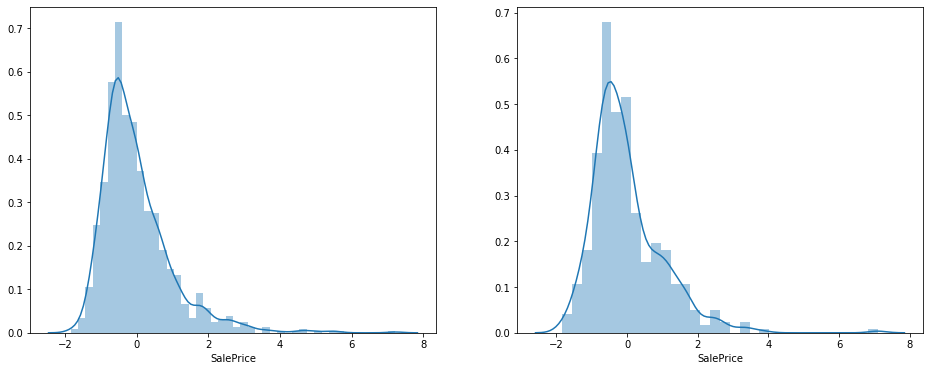

In [100]:
# check the distribution after scaling
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)
plt.show()

In [101]:
# splitting the dependent and independent variable
y_train = df_train.pop('SalePrice')
X_train = df_train

X_train.shape

(1021, 151)

In [102]:
y_test = df_test.pop('SalePrice')
X_test = df_test

X_test.shape

(438, 151)

## Model Building and Evaluation

### Simple Linear Regression (SLR)

In [103]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
# running RFE with 70 features
rfe = RFE(lm, 70)             
rfe = rfe.fit(X_train, y_train)

In [105]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [106]:
rfe_scores.sort_values(by = ['Rank'])

,Column_Names,Status,Rank
75,Neighborhood_Somerst,True,1
61,Neighborhood_Edwards,True,1
60,Neighborhood_Crawfor,True,1
100,Exterior1st_HdBoard,True,1
101,Exterior1st_ImStucc,True,1
56,Neighborhood_BrDale,True,1
53,LotConfig_FR3,True,1
52,LotConfig_FR2,True,1
51,LotConfig_CulDSac,True,1
49,LotShape_IR3,True,1


In [107]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel_columns

['OverallQual',
 'BsmtExposure',
 'BsmtFinType1',
 '2ndFlrSF',
 'GrLivArea',
 'KitchenQual',
 'GarageCars',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_180',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_BrDale',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Unf',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc

In [108]:
# filter the train and test set for the RFE selected columns
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

print(X_train.shape,'\n',X_test.shape)

(1021, 70) 
 (438, 70)


In [109]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.8022460937499999
[ 2.10814784e-01  1.23120223e-01  1.00547476e-01  1.63777438e-01
  2.90841462e-01  1.15171369e-01  1.45907712e-01 -8.66198850e-02
 -8.51440921e-02  4.41520433e-01  2.44989619e-01  2.46854001e-01
  6.05589986e-01 -1.75919650e-01  2.93487156e+12 -3.24351556e-01
 -4.66832845e-01  1.88725593e-01 -2.19414258e-01 -1.87301751e-02
 -5.14189006e-02 -3.47548117e-01  2.81482711e-01  2.97906196e-01
 -1.51848391e-01 -8.09273282e-02  3.82606023e-01  6.48807990e-01
  7.24958654e-01 -1.91250360e-01 -1.04495341e-01  1.91433651e-01
  8.11664372e-01  5.82406425e-01 -2.93487156e+12 -1.89384538e-01
 -1.12717597e-01  4.39108795e-01  6.59402783e-01 -3.98181927e-01
  5.00419479e-01  4.35981814e-01  1.18859560e-01  1.92615847e-01
 -9.51610662e-02 -5.31132085e-01  7.08719395e+12 -4.23278203e-02
  5.19337575e+08 -1.65687737e-01 -9.15942841e-02  3.33500557e-01
 -7.08719395e+12 -3.83074354e-01  2.77708798e-01 -1.73197933e-01
  1.42926288e-01 -3.95655414e-01  9.73977958e-02  2.26462979e-01
 -3.3

In [111]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8438988279418574
-616795790006751.2
159.37929667136348
2.697115174912772e+17
0.15610117205814247
615779720299719.6


In [112]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

### Ridge Regression

In [113]:
ridge = Ridge(random_state=42)

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,n_jobs=-1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   19.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=42,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [114]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=200]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])[:30]

,param_alpha,mean_train_score,mean_test_score,rank_test_score
22,10,-0.246681,-0.268627,1
21,9,-0.246111,-0.268650,2
20,8,-0.245518,-0.268731,3
19,7,-0.244918,-0.268868,4
18,6,-0.244283,-0.269087,5
17,5,-0.243616,-0.269462,6
16,4,-0.242967,-0.269968,7
23,20,-0.251847,-0.270011,8
15,3,-0.242387,-0.270755,9
14,2,-0.241886,-0.271783,10


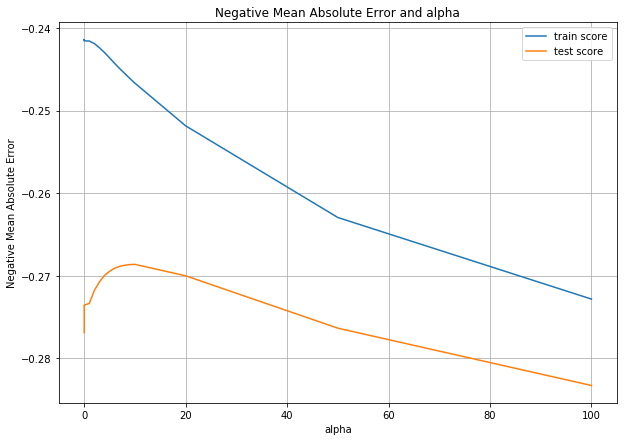

In [115]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(10,7))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and alpha')
plt.grid()
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [116]:
# get the best estimator for lambda
ridge_model_cv.best_estimator_

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=42, solver='auto', tol=0.001)

In [117]:
# check the coefficient values with lambda = 10.0
alpha = 10.0
ridge = Ridge(random_state=42,alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.24770332,  0.11376527,  0.09774416,  0.0590809 ,  0.33172935,
        0.11960803,  0.13036509, -0.04930979, -0.00915818,  0.12483433,
        0.02581538,  0.03532072,  0.09021459,  0.00222344, -0.10324381,
       -0.13538733, -0.00456265,  0.16943635, -0.1517883 ,  0.15026626,
       -0.07204092, -0.08688789,  0.05461729,  0.26890448, -0.14027101,
       -0.0691403 ,  0.04566449,  0.41947365,  0.49006309, -0.17292635,
       -0.10892724,  0.08099533,  0.40282364,  0.1571943 , -0.10324381,
       -0.21626223, -0.18397016,  0.02962916,  0.30091894, -0.09100224,
        0.07512901,  0.03742622,  0.11382374,  0.03331934, -0.01558842,
       -0.05341049, -0.0006874 , -0.0496307 ,  0.        , -0.13403696,
       -0.04809339,  0.14939442, -0.0006874 , -0.01268853,  0.03641036,
       -0.196899  ,  0.09754757, -0.06422602,  0.02660203,  0.03071737,
        0.04558974, -0.02909237,  0.00203921,  0.1028735 ,  0.1028735 ,
        0.06260135,  0.13498729, -0.01732692,  0.08254122,  0.28

In [118]:
# Check the mean squared error
mean_squared_error(y_test, ridge.predict(X_test))

0.1183539175778625

In [119]:
# Put the Features and coefficienst in a dataframe
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df['ABS Coefficients']=abs(ridge.coef_)
ridge_df.sort_values(by=['ABS Coefficients'],ascending=False,inplace = True)
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient,ABS Coefficients
0,Neighborhood_NridgHt,0.4901,0.490063
1,Neighborhood_NoRidge,0.4195,0.419474
2,Neighborhood_StoneBr,0.4028,0.402824
3,GrLivArea,0.3317,0.331729
4,HouseStyle_1Story,0.3009,0.300919
5,SaleCondition_Partial,0.2895,0.289530
6,Neighborhood_Crawfor,0.2689,0.268904
7,OverallQual,0.2477,0.247703
8,BldgType_Twnhs,-0.2163,0.216262
9,Exterior2nd_Stucco,-0.1969,0.196899


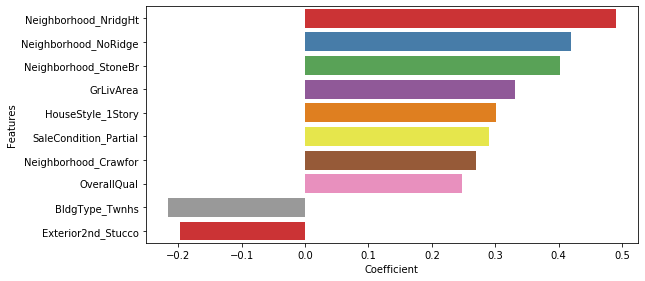

In [120]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(30,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = ridge_df.head(10))
plt.show()

In [121]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train_ridge)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_ridge)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_ridge))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_ridge))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_ridge)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_ridge)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8391931514419799
0.8814507920830842
164.18379237773843
51.83901589910377
0.16080684855802002
0.1183539175778625


In [122]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# calculating Adjusted R-squared using the formula
adjusted_r2_ridge = 1-(1-r2_test_lr)*(n-1)/(n-p-1)
print('R2 Score for Ridge Regression         :',r2_test_lr)
print('Adjusted R2 Score for Ridge Regression:',adjusted_r2_ridge)

R2 Score for Ridge Regression         : 0.8814507920830842
Adjusted R2 Score for Ridge Regression: 0.8588392265403482


### Lasso Regression

In [145]:
lasso = Lasso(random_state=42)

params = {'alpha': np.arange(0, 1, 0.001).tolist()}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,n_jobs=-1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1800 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 4300 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   19.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.007, 0.008, 0.009000000000000001,
                                   0.01, 0.011, 0.012, 0.013000000000000001,
                                   0.014, 0.015, 0.016, 0.017,
                                   0.018000000000000002, 0.019, 0.02, 0.021,
                                   0.022, 0.023, 0.024, 0.025,
                                   0.026000000000000002, 0.027, 0.028, 0.029, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg

In [146]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=0.9]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])[:15]

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.003,-0.250966,-0.272035,1
2,0.002,-0.248579,-0.272810,2
4,0.004,-0.253527,-0.273158,3
1,0.001,-0.245313,-0.274066,4
5,0.005,-0.257020,-0.274742,5
0,0,-0.241422,-0.276881,6
6,0.006,-0.260965,-0.277024,7
7,0.007,-0.264792,-0.279817,8
8,0.008,-0.268388,-0.282954,9
9,0.009,-0.271498,-0.285913,10


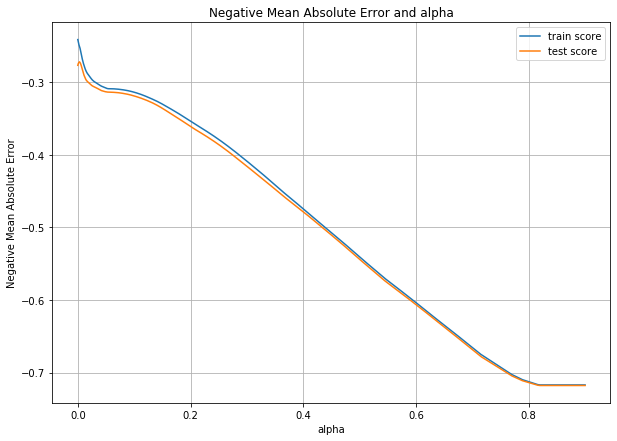

In [147]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting
plt.figure(figsize=(10,7))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.grid()
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [148]:
# get the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
# check the coefficient values with lambda = 0.003

alpha = 0.003

lasso = Lasso(random_state=42, alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 2.56732621e-01,  1.10667604e-01,  9.47165610e-02,  3.22377131e-02,
        3.40566469e-01,  1.19799115e-01,  1.14067298e-01, -0.00000000e+00,
       -0.00000000e+00,  4.65507637e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.31252156e-01, -9.02091426e-02,
        0.00000000e+00,  1.32374327e-01, -0.00000000e+00,  1.43587913e-01,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  2.65148041e-01,
       -8.96198252e-02, -3.57345224e-02,  0.00000000e+00,  4.97324677e-01,
        5.34231516e-01, -1.38607314e-01, -0.00000000e+00,  4.67828716e-02,
        4.52365159e-01,  0.00000000e+00, -1.25595158e-03, -1.96601155e-01,
       -1.92276884e-01,  0.00000000e+00,  2.24319954e-01, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  8.65914472e-02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -2.58520584e-02,
        0.00000000e+00, -4.13460647e-02, -0.00000000e+00,  7.00177119e-02,
        0.00000000e+00, -

In [128]:
# Check the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.11537313390890298

In [129]:
# Put the shortlisted Features and coefficienst in a dataframe
lasso_df=pd.DataFrame()
lasso_df['Features'] = X_train.columns
lasso_df['Coefficients']=lasso.coef_
lasso_df['ABS Coefficients'] = abs(lasso.coef_)
lasso_df.sort_values(by=['ABS Coefficients'],ascending=False,inplace = True)
lasso_df

,Features,Coefficients,ABS Coefficients
28,Neighborhood_NridgHt,5.342315e-01,5.342315e-01
27,Neighborhood_NoRidge,4.973247e-01,4.973247e-01
32,Neighborhood_StoneBr,4.523652e-01,4.523652e-01
4,GrLivArea,3.405665e-01,3.405665e-01
69,SaleCondition_Partial,2.815181e-01,2.815181e-01
23,Neighborhood_Crawfor,2.651480e-01,2.651480e-01
0,OverallQual,2.567326e-01,2.567326e-01
38,HouseStyle_1Story,2.243200e-01,2.243200e-01
35,BldgType_Twnhs,-1.966012e-01,1.966012e-01
36,BldgType_TwnhsE,-1.922769e-01,1.922769e-01


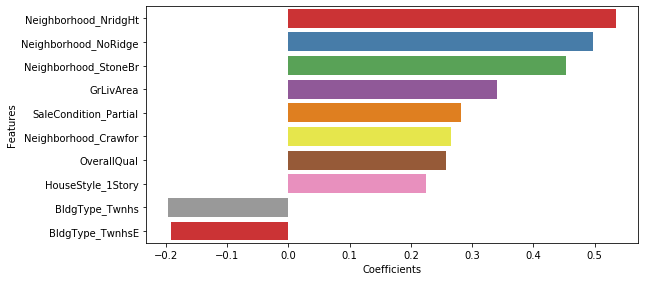

In [130]:
#bar plot to determine the variables that would affect pricing most using lasso regression
plt.figure(figsize=(30,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficients', palette='Set1', data = lasso_df.head(10))
plt.show()

In [131]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train_lasso)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lasso)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lasso))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lasso))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lasso)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lasso)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8322459403038196
0.8844364942056553
171.27689494980012
50.533432652099506
0.16775405969618035
0.11537313390890298


In [132]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# calculating Adjusted R-squared using the formula
adjusted_r2_lasso = 1-(1-r2_test_lr)*(n-1)/(n-p-1)
print('R2 Score for Ridge Regression         :',r2_test_lr)
print('Adjusted R2 Score for Ridge Regression:',adjusted_r2_lasso)

R2 Score for Ridge Regression         : 0.8844364942056553
Adjusted R2 Score for Ridge Regression: 0.8623944086318021


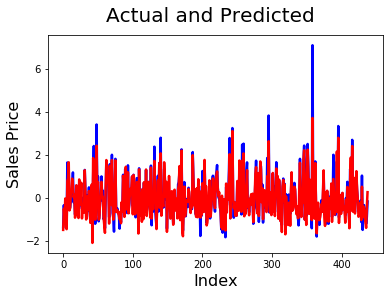

In [133]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_test_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label
plt.show()

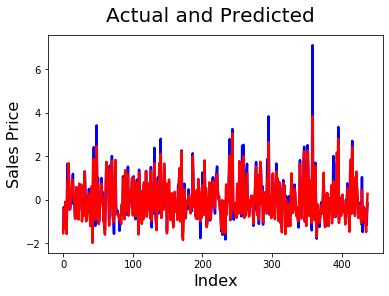

In [134]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_test_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label
plt.show()

In [135]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.438988e-01,0.839193,0.832246
1,R2 Score (Test),-6.167958e+14,0.881451,0.884436
2,RSS (Train),1.593793e+02,164.183792,171.276895
3,RSS (Test),2.697115e+17,51.839016,50.533433
4,MSE (Train),3.950964e-01,0.401007,0.409578
5,MSE (Test),2.481491e+07,0.344026,0.339666


In [136]:
betas = pd.DataFrame(index=X_train.columns)

In [137]:
betas.rows = X_train.columns

In [138]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [139]:
pd.set_option('display.max_rows', None)
betas.head(70)

,Linear,Ridge,Lasso
OverallQual,2.108148e-01,0.247703,2.567326e-01
BsmtExposure,1.231202e-01,0.113765,1.106676e-01
BsmtFinType1,1.005475e-01,0.097744,9.471656e-02
2ndFlrSF,1.637774e-01,0.059081,3.223771e-02
GrLivArea,2.908415e-01,0.331729,3.405665e-01
KitchenQual,1.151714e-01,0.119608,1.197991e-01
GarageCars,1.459077e-01,0.130365,1.140673e-01
MSSubClass_30,-8.661988e-02,-0.049310,-0.000000e+00
MSSubClass_40,-8.514409e-02,-0.009158,-0.000000e+00
MSSubClass_50,4.415204e-01,0.124834,4.655076e-02
